<a href="https://colab.research.google.com/github/sppu33/DSBDAL/blob/main/dsbdal2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


In [5]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,8
reading score,6
writing score,9


as number of null values are less so we can drop the rows

In [6]:
df.shape

(1000, 8)

#Droping Null Rows

In [7]:
df_clean=df.dropna()

You can also do, df.ffill() or bfill()

In [9]:
df_clean.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [11]:
df_clean.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,object
reading score,float64
writing score,float64


Converting the math score of object type to float

In [16]:
# df_clean["math score"]=df_clean["math score"].astype(pd.Float64Dtype())
# Above line dont work as there are some rows with '?' in it

df_clean["math score"] = df_clean["math score"].replace("?", np.nan)  # Replace '?' with NaN
df_clean["math score"] = df_clean["math score"].astype(pd.Float64Dtype())  # Convert to Float64

<ipython-input-16-15c965c88ae9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["math score"] = df_clean["math score"].replace("?", np.nan)  # Replace '?' with NaN
<ipython-input-16-15c965c88ae9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["math score"] = df_clean["math score"].astype(pd.Float64Dtype())  # Convert to Float64


In [17]:
df_clean.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       990, 991, 992, 993, 994, 995, 996, 997, 998, 999],
      dtype='int64', length=978)

In [18]:
df_clean.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,Float64
reading score,float64
writing score,float64


# Lets work on plotting and removing outliers


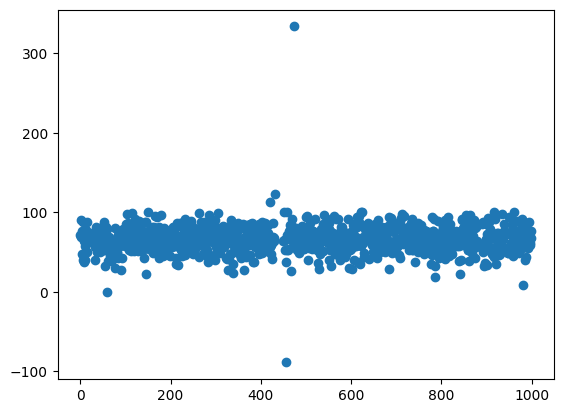

In [19]:
import matplotlib.pyplot as plt
plt.scatter(df_clean.index, df_clean["math score"])

In [20]:
data=df_clean

In [21]:
q1=data["math score"].quantile(0.25)
q3=data["math score"].quantile(0.75)
IQR=q3-q1
data=data[(data["math score"] > (q1-1.5*IQR)) & (data["math score"] < (q3+1.5*IQR))]

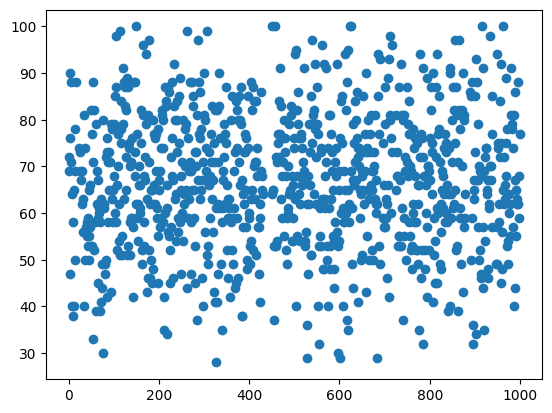

In [22]:
plt.scatter(data.index,data["math score"])

# Normalization

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [24]:
numericData= data.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'], axis=1)

In [26]:
numericData.head()

,math score,reading score,writing score
0,72.0,72.0,74.0
1,69.0,90.0,88.0
2,90.0,95.0,93.0
3,47.0,57.0,44.0
4,76.0,78.0,75.0


In [31]:
df_norm=(numericData-numericData.min())/(numericData.max()-numericData.min())

In [32]:
df_norm.head()

,math score,reading score,writing score
0,0.611111,0.711340,0.106884
1,0.569444,0.896907,0.132246
2,0.861111,0.948454,0.141304
3,0.263889,0.556701,0.052536
4,0.666667,0.773196,0.108696


In [33]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [37]:
dfs=[data, df_norm]

In [38]:
norm_final_data= pd.concat(dfs,axis=1)

In [39]:
norm_final_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,0.611111,0.711340,0.106884
1,female,group C,some college,standard,completed,69.0,90.0,88.0,0.569444,0.896907,0.132246
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,0.861111,0.948454,0.141304
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,0.263889,0.556701,0.052536
4,male,group C,some college,standard,none,76.0,78.0,75.0,0.666667,0.773196,0.108696
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0,0.833333,0.989691,0.144928
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0,0.472222,0.536082,0.072464
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0,0.430556,0.701031,0.090580
998,female,group D,some college,standard,completed,68.0,78.0,77.0,0.555556,0.773196,0.112319
